### Import the required libraries for Exploratory data analysis

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import math 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading  the dataset from csv file using pandas library

data = pd.read_csv("Stores.csv")
data

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620
...,...,...,...,...,...
891,892,1582,1910,1080,66390
892,893,1387,1663,850,82080
893,894,1200,1436,1060,76440
894,895,1299,1560,770,96610


## Exploratory data analysis(EDA)

### Dataset 

We have the dataset where we have a supermarket data which includes 896 stores and first column denoting store id and then Store_area in yard square , number of items available in the store , no of customers comes in store on an average in a month , sales of the store per month in US dollars

In [3]:
data.columns = (['Store_Id', 'Store_Area', 'Items_Available', 'Daily_Customer_Count', 'Store_Sales' ])
data

,Store_Id,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620
...,...,...,...,...,...
891,892,1582,1910,1080,66390
892,893,1387,1663,850,82080
893,894,1200,1436,1060,76440
894,895,1299,1560,770,96610


In [4]:
data.value_counts() # Count of the values

Store_Id  Store_Area  Items_Available  Daily_Customer_Count  Store_Sales
1         1659        1961             530                   66490          1
2         1461        1752             210                   39820          1
591       1206        1437             1330                  54060          1
592       1847        2186             910                   75120          1
593       1009        1202             330                   41600          1
                                                                           ..
303       1391        1648             720                   77070          1
304       1577        1892             560                   74730          1
305       1092        1314             600                   76530          1
306       1375        1681             440                   68900          1
896       1174        1429             1110                  54340          1
Length: 896, dtype: int64

In [5]:
data.columns # Checking the columns 

Index(['Store_Id', 'Store_Area', 'Items_Available', 'Daily_Customer_Count',
       'Store_Sales'],
      dtype='object')

In [6]:
data.shape # shape of the data 

(896, 5)

In [7]:
data.info() # Taking a info of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store_Id              896 non-null    int64
 1   Store_Area            896 non-null    int64
 2   Items_Available       896 non-null    int64
 3   Daily_Customer_Count  896 non-null    int64
 4   Store_Sales           896 non-null    int64
dtypes: int64(5)
memory usage: 35.1 KB


In [8]:
data.ndim # 2d data

2

In [9]:
data.isnull().sum() # Checking null values

Store_Id                0
Store_Area              0
Items_Available         0
Daily_Customer_Count    0
Store_Sales             0
dtype: int64

In [10]:
data.isnull().sum().sum() # Checking null values

0

### Observation 

No null values in the dataset to treat.

In [11]:
data.count() # Counting values

Store_Id                896
Store_Area              896
Items_Available         896
Daily_Customer_Count    896
Store_Sales             896
dtype: int64

In [12]:
data.describe(include = 'all')

,Store_Id,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
count,896.000000,896.000000,896.000000,896.000000,896.000000
mean,448.500000,1485.409598,1782.035714,786.350446,59351.305804
std,258.797218,250.237011,299.872053,265.389281,17190.741895
min,1.000000,775.000000,932.000000,10.000000,14920.000000
25%,224.750000,1316.750000,1575.500000,600.000000,46530.000000
50%,448.500000,1477.000000,1773.500000,780.000000,58605.000000
75%,672.250000,1653.500000,1982.750000,970.000000,71872.500000
max,896.000000,2229.000000,2667.000000,1560.000000,116320.000000


In [13]:
data.dtypes # Checking data type 

Store_Id                int64
Store_Area              int64
Items_Available         int64
Daily_Customer_Count    int64
Store_Sales             int64
dtype: object

In [14]:
data.Store_Sales.value_counts(normalize = True) # Normalizing the values 

54590    0.003348
63540    0.003348
74080    0.002232
63660    0.002232
77120    0.002232
           ...   
50740    0.001116
77070    0.001116
74730    0.001116
68900    0.001116
54340    0.001116
Name: Store_Sales, Length: 816, dtype: float64

In [15]:
data.Daily_Customer_Count.value_counts(normalize = True)

670     0.021205
680     0.018973
760     0.018973
790     0.017857
860     0.016741
          ...   
130     0.001116
1390    0.001116
1300    0.001116
10      0.001116
140     0.001116
Name: Daily_Customer_Count, Length: 130, dtype: float64

In [16]:
data['Daily_Customer_Count']

0       530
1       210
2       720
3       620
4       450
       ... 
891    1080
892     850
893    1060
894     770
895    1110
Name: Daily_Customer_Count, Length: 896, dtype: int64

In [17]:
data.describe() # Statistical information of the dataset

,Store_Id,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
count,896.000000,896.000000,896.000000,896.000000,896.000000
mean,448.500000,1485.409598,1782.035714,786.350446,59351.305804
std,258.797218,250.237011,299.872053,265.389281,17190.741895
min,1.000000,775.000000,932.000000,10.000000,14920.000000
25%,224.750000,1316.750000,1575.500000,600.000000,46530.000000
50%,448.500000,1477.000000,1773.500000,780.000000,58605.000000
75%,672.250000,1653.500000,1982.750000,970.000000,71872.500000
max,896.000000,2229.000000,2667.000000,1560.000000,116320.000000


In [18]:
# Viewing all the Categorical columns
cat = data.select_dtypes(include = 'object').columns.to_list()
cat

# No categorical data or values  found 

[]

In [19]:
data['Store_Sales'].mean() # mean sale value of the month  is 59351.30580357143

59351.30580357143

In [20]:
mean = data['Daily_Customer_Count'].mean() 
mean

786.3504464285714

In [21]:
mean = round(mean)
mean 

# average of the daily customers in the market

786

In [22]:
data.Store_Sales.quantile([0.5, 0.7, 0.9, 0.95, 0.99]) # Sales values at 50, 70 , 90, 95, 99 % quantile

0.50    58605.0
0.70    69200.0
0.90    82045.0
0.95    87900.0
0.99    98321.0
Name: Store_Sales, dtype: float64

### The basic EDA (Exploratory data analysis is completed)

## Data Visualization 

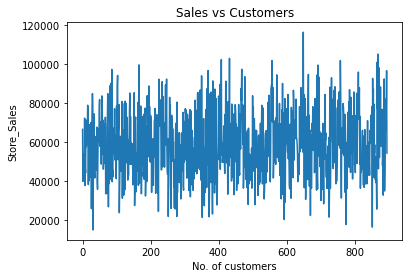

In [23]:
plt.plot(data['Store_Sales'])
plt.ylabel("Store_Sales")
plt.xlabel("No. of customers")

plt.title("Sales vs Customers")
plt.show()

#### The data is following the Stationary pattern, like we can't say that the Sales are increasing or decreasing because of Stationarity Pattern.

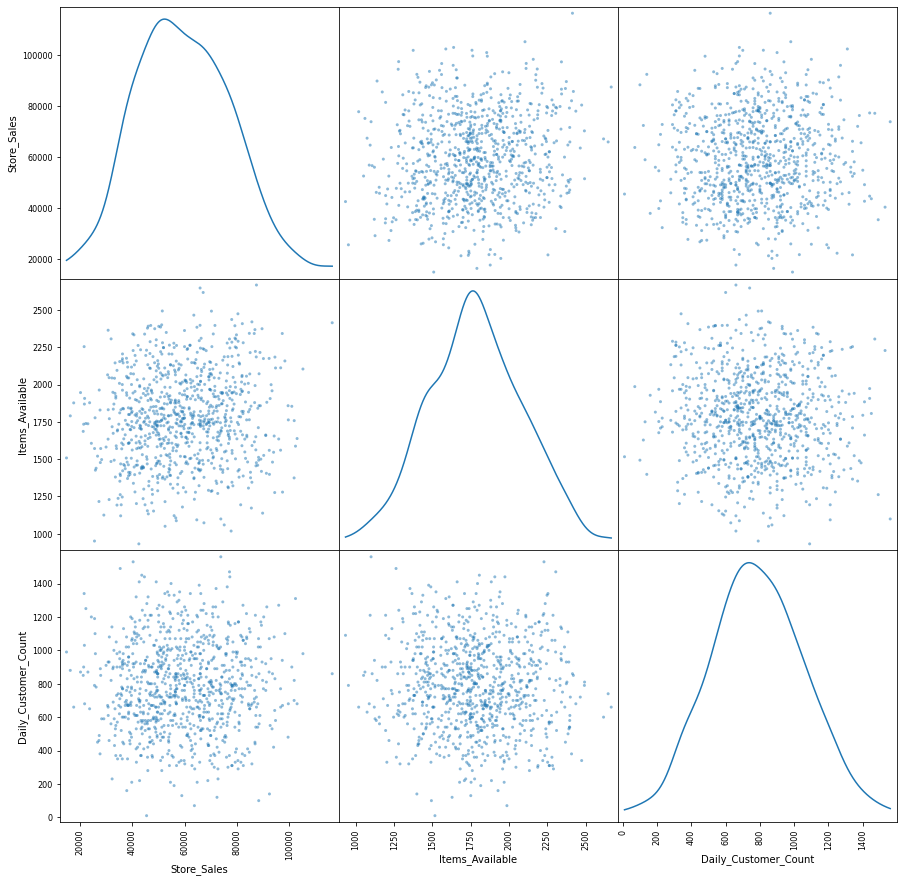

In [24]:
pd.plotting.scatter_matrix(
    data[["Store_Sales", "Items_Available", "Daily_Customer_Count"]],
    figsize = (15, 15),
    diagonal = "kde")
plt.show()

#### A scatter matrix (pairs plot) compactly plots all the numeric variables we have in a dataset against each other. The plots on the main diagonal allow you to visually define the type of data distribution: the distribution is similar to normal for Store_Sales, and for Items_Available and the Daily_Customer_Count, the geometric distribution is more suitable.

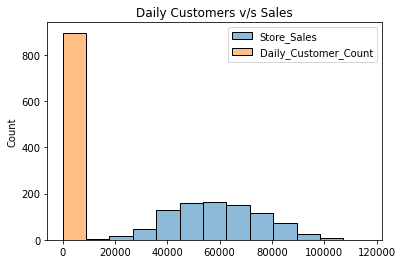

In [25]:
# Plotting
sns.histplot(data[['Store_Sales', 'Daily_Customer_Count']])
plt.title("Daily Customers v/s Sales")
plt.show()

#### From histogram we can conclude that the Sales are low , so we have to improve our products because a lot of customers are coming to our Store but a lot from them  not purchasing the products. Then , It may happen because of two reasons--
#### 1) Prices of Product are high
#### 2) Quality of the products is not good

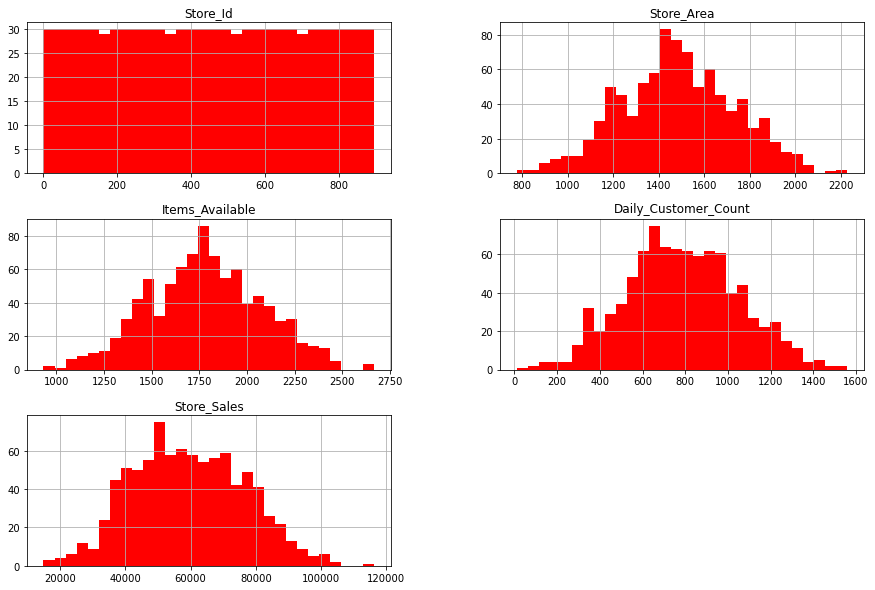

In [26]:
# Histogram

data.hist(color = "r",
        bins = 30,
        figsize = (15, 10))
plt.show()

#### A visual analysis of the histograms presented allows us to make preliminary assumptions about the variability of the source data.

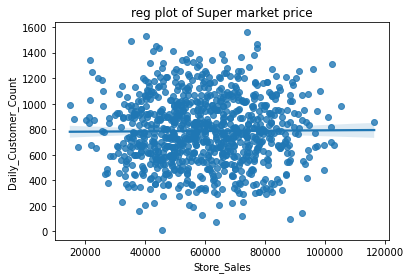

In [27]:
sns.regplot(data = data, x = 'Store_Sales', y = 'Daily_Customer_Count', logistic = False)
plt.title("reg plot of Super market price")
plt.show()


#### It is a regression plot, the regplot() function takes an argument logistic, which allows you to specify whether you wish to estimate the logistic regression model for the given data using True or False values.
#### But un this project we are applying many models so no need to set True here..

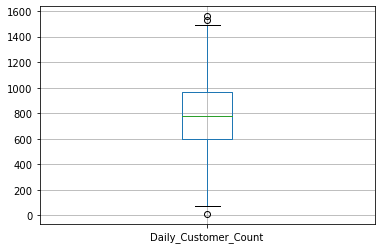

In [28]:
data.boxplot(column = "Daily_Customer_Count")
plt.show()

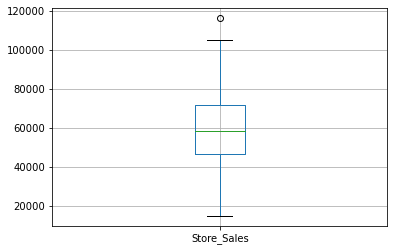

In [29]:
data.boxplot(column = "Store_Sales")
plt.show()

#### From both the boxplots, we conclude that , in the Store Sales there is outlier zone after approx 110000 Sales and in the customer count the outlier zone is after crossing the customer count of 1400..

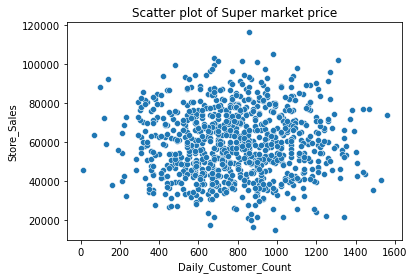

In [30]:
sns.scatterplot(data = data, x = 'Daily_Customer_Count', y = 'Store_Sales')
plt.title("Scatter plot of Super market price")
plt.show()


In [31]:
data.head() # Checking data

,Store_Id,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620


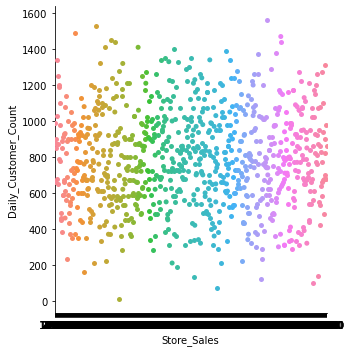

In [32]:
sns.catplot(data = data, x = 'Store_Sales', y = 'Daily_Customer_Count')
plt.show()


#### The catplot is correctly showing that as the customer count increase the Store_Sales are also increasing.

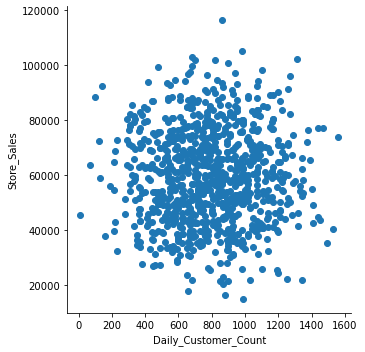

In [33]:
sns.FacetGrid(data, size=5) \
   .map(plt.scatter, "Daily_Customer_Count", "Store_Sales") \
   .add_legend()
plt.show()


# Same thing as catplot

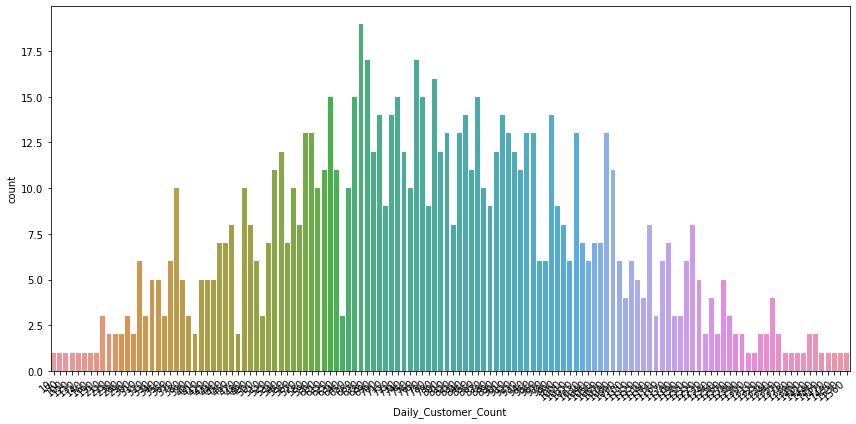

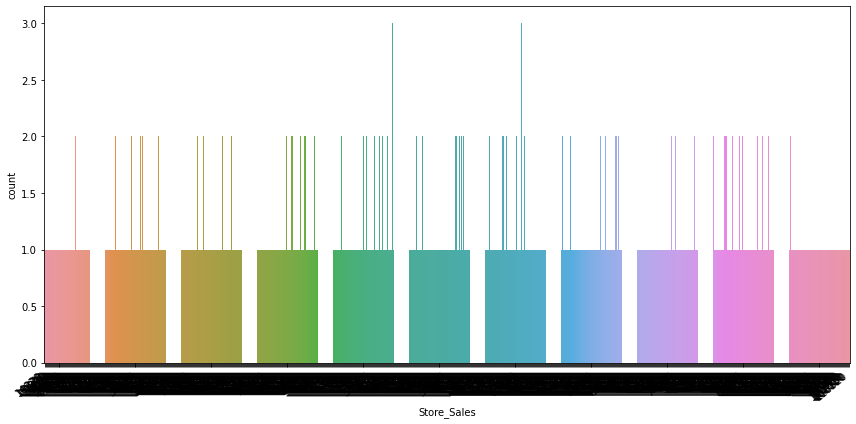

In [34]:
for i in ["Daily_Customer_Count" , "Store_Sales"]:
    plt.figure(figsize = (12 , 6))
    sns.countplot(data = data , x = i)
    
    ax = sns.countplot(x = i, data = data.sort_values('Daily_Customer_Count', ascending = True))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    plt.tight_layout()
    plt.show()
    print("\n\n")

#### The countplot is showing that as the count of the Customer is increasing , The Store_Sales are also increasing in our data.

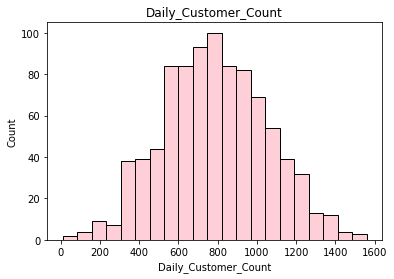

In [35]:
# Plotting a histogram to view how the 'Low' and 'High' feature are laid out.

sns.histplot(data = data["Daily_Customer_Count"] , color="pink", label="Increasing/Decreasing Customer Count)")
plt.title("Daily_Customer_Count")
plt.show()

#### The histogram just showing the increasing/ Decreasing of the Customer count on daily basis. 

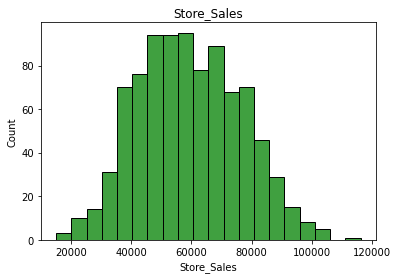

In [36]:
sns.histplot(data = data["Store_Sales"] , color="green", label="Increasing/Decreasing Sales of the Store")
plt.title("Store_Sales")
plt.show()

#### The histogram just showing the Sales of the Store .

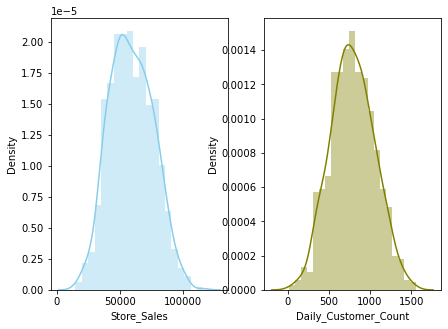

In [37]:
# Create subplots 
f, axes = plt.subplots(1, 2, figsize=(7, 5))
sns.distplot(data["Store_Sales"] , color="skyblue", ax=axes[0])
sns.distplot(data["Daily_Customer_Count"] , color="olive", ax=axes[1])
plt.show()

# The plot is just showing the density like how the sales and customer count both are increasing or decreasing at the same time

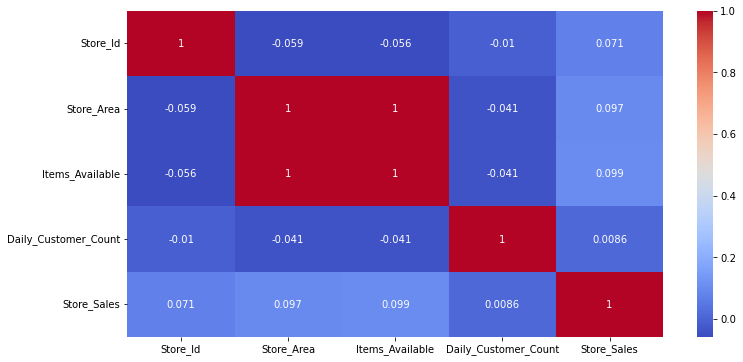

In [119]:
# Heatmap

plt.figure(figsize = (12, 6))
sns.heatmap(data.corr(), annot = True, cmap = "coolwarm")
plt.show()

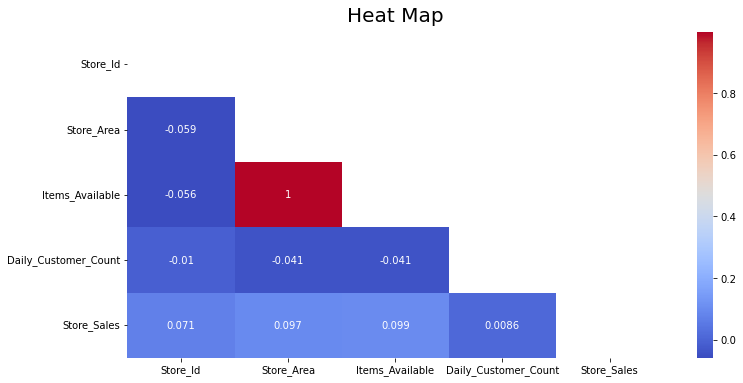

In [120]:
# You will not loose any information if you cut down one part of the heatmap along the diagonal

mask = np.triu(np.ones_like(data.corr(), dtype = np.bool))
plt.figure(figsize = (12, 6))
heatmap = sns.heatmap(data.corr(), cmap = "coolwarm", annot = True, mask = mask)
heatmap.set_title("Heat Map", fontsize = 20, pad = 10)
plt.show()

#### The following code returns the correlation of all features with 'Low' and 'High', a single, dependent variable, sorted in descending order

In [136]:
correlation = data.corr()[['Store_Sales']].sort_values(by = 'Store_Sales', ascending = False)
print(correlation)

                      Store_Sales
Store_Sales              1.000000
Items_Available          0.098849
Store_Area               0.097474
Store_Id                 0.071486
Daily_Customer_Count     0.008629


In [137]:
correlation2 = data.corr()[['Daily_Customer_Count']].sort_values(by = 'Daily_Customer_Count', ascending = False)
print(correlation2)

                      Daily_Customer_Count
Daily_Customer_Count              1.000000
Store_Sales                       0.008629
Store_Id                         -0.010029
Items_Available                  -0.040978
Store_Area                       -0.041423


### Observation
The correlation between the columns,

Here you can see the above cell in descending order the Daily_Customer_Count is about 100 percent correlated in the Comparison of others.

Same you can check from heatmap plotted Below------

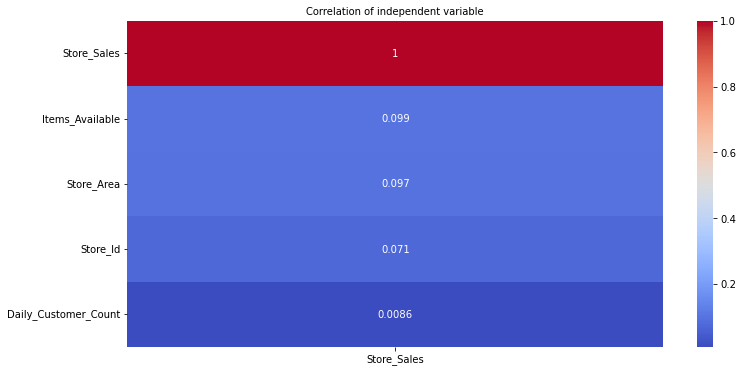

In [139]:
plt.figure(figsize = (12, 6))
heatmap = sns.heatmap(correlation, cmap = "coolwarm", vmax = 1, annot = True)
heatmap.set_title("Correlation of independent variable", fontsize = 10)
plt.show()

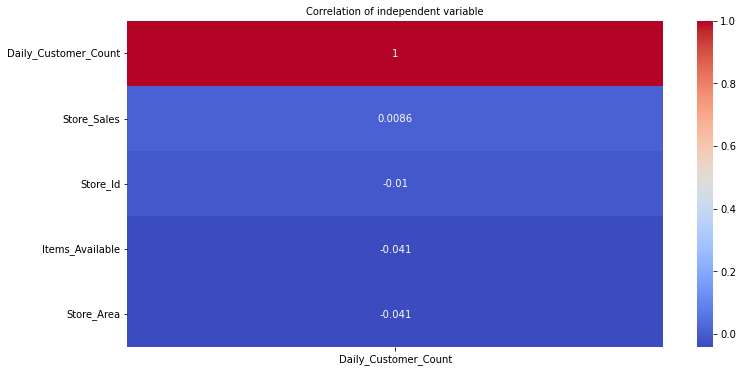

In [140]:
plt.figure(figsize = (12, 6))
heatmap = sns.heatmap(correlation2, cmap = "coolwarm", vmax = 1, annot = True)
heatmap.set_title("Correlation of independent variable", fontsize = 10)
plt.show()

### Insights

We will select the columns which are positevely correlated in our dataset while selecting negatively correlated data as you can see in the heatmap that blue column is highly correlated (Store_Sales ) but red is not highly correlated. 
The red column is highly correlated  while the blue column is less correlated

### Now,  the basic Cleaning, visualization,  EDA and feature Engineering is done , now Building the machine learning model.

## Supervised Machine learning 

In [38]:
# Separating the data or data pre- processing

X = data[['Store_Id', 'Daily_Customer_Count']]
Y = data.Store_Sales

In [39]:
# Dividing the data into training and testing (80% training and 20 % test data)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,
                                                      train_size=0.8, test_size=0.2,
                                                      random_state=0)

y_test = np.array(y_test) # Converting the test values in the numpy for further formatting in the data

In [40]:
X_train.shape ,X_test.shape ,y_train.shape  , y_test.shape # Training and testing data shapes

((716, 2), (180, 2), (716,), (180,))

### Let's apply Supervised  Machine learning algorithms ----

### 1) Random Forest Algorithm

In [41]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# function for comparing different approaches
model = RandomForestRegressor(n_estimators=100, random_state=0) # 100 are the forests random forests
model.fit(X_train, y_train)
preds = model.predict(X_test)

In [42]:
print('[1]Random Forest Algorithm Training Accuracy:', model.score(X_train, y_train))

[1]Random Forest Algorithm Training Accuracy: 0.8412128525520515


In [43]:
y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

In [44]:
## OBSERVATION

In [45]:
print("MAE from Approach 1 Random Forest Algorithm:")
print(mean_absolute_error(preds, y_test))

MAE from Approach 1 Random Forest Algorithm:
14951.138333333332


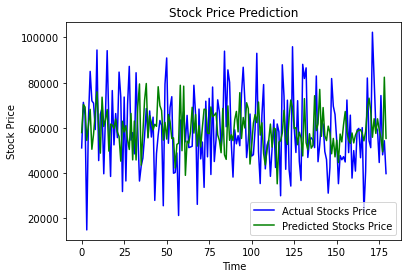

In [46]:
plt.plot(y_test, color = 'blue', label = 'Actual Stocks Price')
plt.plot(preds , color = 'green', label = 'Predicted Stocks Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [47]:
comparison = pd.DataFrame({'Actual':y_test, 'Predicted': preds})
comparison

,Actual,Predicted
0,51190,57963.9
1,71300,70348.7
2,65660,69222.5
3,14920,54470.7
4,64010,61163.6
...,...,...
175,44730,59205.9
176,74320,55639.0
177,48120,49456.9
178,54340,82428.0


## Observation 

Calculated Mean absolute error in case of Random Forest algorithm is 14951.138333333332

### 2) Decision Tree Regressor 

In [48]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

In [49]:
Dt_model = DecisionTreeRegressor(random_state = 1)
Dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

In [50]:
print('[2]Decision Tree Regressor Training Accuracy:', model.score(X_train, y_train))

[2]Decision Tree Regressor Training Accuracy: 0.8412128525520515


In [51]:
preds = Dt_model.predict(X_test)
print("MAE from Approach 2 Decision Tree Regressor:")
mean_absolute_error(y_test, preds)

MAE from Approach 2 Decision Tree Regressor:


18356.777777777777

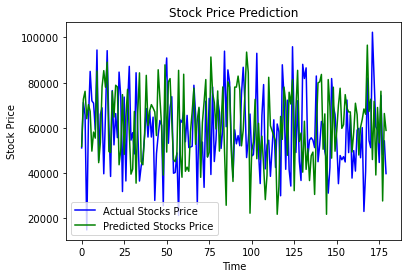

In [52]:
plt.plot(y_test, color = 'blue', label = 'Actual Stocks Price')
plt.plot(preds , color = 'green', label = 'Predicted Stocks Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [53]:
comparison = pd.DataFrame({'Actual':y_test, 'Predicted': preds})
comparison

,Actual,Predicted
0,51190,51850.0
1,71300,72710.0
2,65660,76200.0
3,14920,64090.0
4,64010,70310.0
...,...,...
175,44730,53370.0
176,74320,76240.0
177,48120,27720.0
178,54340,66390.0


## Observation 

Calculated Mean absolute error in case of Decision Tree Regressor is 18356.777777777777.

### 3) XGB Regressor or Gradient Boosting

In [54]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

In [55]:
xg_model = XGBRegressor(random_state = 1)
xg_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=1, reg_alpha=0,
             reg_lambda=1, ...)

In [56]:
print('[3] XGBRegressor Training Accuracy:', xg_model.score(X_train, y_train))

[3] XGBRegressor Training Accuracy: 0.9264515369368127


In [57]:
preds_xg = xg_model.predict(X_test)
# preds_xg

print("MAE from Approach 3 XGB or Gradient boosting Regressor:")
mean_absolute_error(y_test, preds_xg)

MAE from Approach 3 XGB or Gradient boosting Regressor:


16527.21515842014

In [58]:
print("Let's improve the model....")

Let's improve the model....


In [59]:
xg_model_2 = XGBRegressor(n_estimators=500, learning_rate=0.05)
xg_model_2.fit(X_train, y_train)    

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=500, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [60]:
print('[3] XGBRegressor Training Accuracy:', xg_model_2.score(X_train, y_train))

[3] XGBRegressor Training Accuracy: 0.8650656796102538


In [61]:
preds_xg = xg_model.predict(X_test)

print("MAE from Approach 3 after improving model XGB or Gradient boosting Regressor:")
mean_absolute_error(y_test, preds_xg)

MAE from Approach 3 after improving model XGB or Gradient boosting Regressor:


16527.21515842014

In [62]:
print("We can see the difference in training accuracy and mean absolute error after using n_estimators and learning rate..")

We can see the difference in training accuracy and mean absolute error after using n_estimators and learning rate..


In [63]:
xg_model_3 = XGBRegressor(n_estimators=500, learning_rate=0.01)
xg_model_3.fit(X_train, y_train)   

preds_xg = xg_model.predict(X_test)

print("MAE from Approach 3 after improving learning rate of the model :")
mean_absolute_error(y_test, preds_xg)

MAE from Approach 3 after improving learning rate of the model :


16527.21515842014

In [64]:
print('[3] XGBRegressor Training Accuracy:', xg_model_3.score(X_train, y_train))

[3] XGBRegressor Training Accuracy: 0.43915545545729406


In [65]:
print("wooh that's great check accuracy and mean absolute error decreased so much...")

wooh that's great check accuracy and mean absolute error decreased so much...


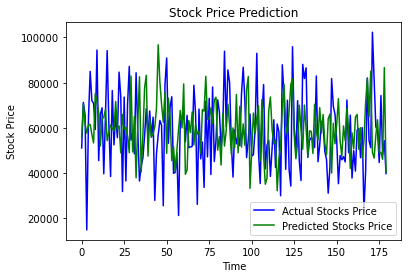

In [66]:
plt.plot(y_test, color = 'blue', label = 'Actual Stocks Price')
plt.plot(preds_xg , color = 'green', label = 'Predicted Stocks Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [67]:
comparison = pd.DataFrame({'Actual':y_test, 'Predicted': preds_xg})
comparison

,Actual,Predicted
0,51190,55963.808594
1,71300,70638.492188
2,65660,61898.882812
3,14920,57735.921875
4,64010,61399.476562
...,...,...
175,44730,49160.398438
176,74320,49198.738281
177,48120,46149.722656
178,54340,86687.578125


In [68]:
# But increasing the learning rate of n_estimators can do delay in the model running when we work on bigger data

### Observation

Calculated Mean absolute error in case of XGB Regressor for 1st approach  is 16527.21515842014.

for 2nd approach after improving the model 16136.224370659722.

for 3rd approach after improving learning rate 14213.629058159722.

### Others models to apply

### 4) Ridge Classifier or Regressor

In [69]:
# Importing required libraries
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report

In [70]:
# We can calculate these types of errors using Ridge classifier
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [71]:
params = {'alpha' : [0.0001, 0.001, 0.1, 1, 10, 100, 1000, 10000, 100000]}
ridge_regressor = GridSearchCV(Ridge(), params, cv = 5, scoring = 'neg_mean_absolute_error', n_jobs = -1)
ridge_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.1, 1, 10, 100, 1000, 10000,
                                   100000]},
             scoring='neg_mean_absolute_error')

In [72]:
print('[4] RidgeClassifier Training Accuracy:', ridge_regressor.score(X_train, y_train))

[4] RidgeClassifier Training Accuracy: -14337.717858639582


In [73]:
y_train_pred = ridge_regressor.predict(X_test) # predict train result

In [74]:
print("MAE from Approach 4 Ridge Classifier or Regressor:")
mean_absolute_error(y_test, y_train_pred)

MAE from Approach 4 Ridge Classifier or Regressor:


13746.486214098957

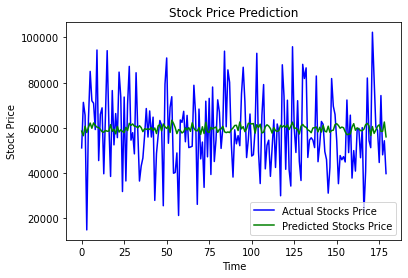

In [75]:
plt.plot(y_test, color = 'blue', label = 'Actual Stocks Price')
plt.plot(y_train_pred , color = 'green', label = 'Predicted Stocks Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [76]:
comparison = pd.DataFrame({'Actual':y_test, 'Predicted': y_train_pred})
comparison

,Actual,Predicted
0,51190,58597.646947
1,71300,56569.007083
2,65660,60765.880319
3,14920,57975.162129
4,64010,60291.249670
...,...,...
175,44730,61372.353951
176,74320,58477.988104
177,48120,58525.346609
178,54340,62621.863771


## Observation 

Calculated Mean absolute error in case of Ridge Classifier is 13746.486214098957.

### 5) Logistic Regression Algorithm

In [77]:
# Using Logistic Regression Algorithm to the Training Set
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(random_state = 0)
log.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [78]:
print('[5] Logistic algorithm or Regressor Training Accuracy:', log.score(X_train, y_train))

[5] Logistic algorithm or Regressor Training Accuracy: 0.023743016759776536


In [79]:
lg_preds = log.predict(X_test)

In [80]:
print("MAE from Approach 5 Logistic algorithm or Regressor:")
mean_absolute_error(y_test, lg_preds)

MAE from Approach 5 Logistic algorithm or Regressor:


18067.722222222223

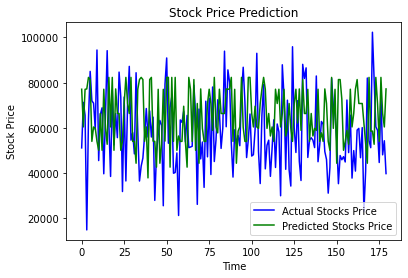

In [81]:
plt.plot(y_test, color = 'blue', label = 'Actual Stocks Price')
plt.plot(lg_preds , color = 'green', label = 'Predicted Stocks Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [82]:
comparison = pd.DataFrame({'Actual':y_test, 'Predicted': lg_preds})
comparison

,Actual,Predicted
0,51190,77120
1,71300,60470
2,65660,77080
3,14920,77250
4,64010,82350
...,...,...
175,44730,54060
176,74320,82350
177,48120,66390
178,54340,60440


## Observation 

Calculated Mean absolute error in case of Logistic algorithm or Regressor is 18067.722222222223.

### 6) KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm

In [83]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [84]:
print('[6] KNeighborsClassifier Method Training accuracy of the model :', knn.score(X_train, y_train))

[6] KNeighborsClassifier Method Training accuracy of the model : 0.19832402234636873


In [85]:
knn_preds = knn.predict(X_test)

In [86]:
print("MAE from Approach 6 KNN Method Regressor:")
mean_absolute_error(y_test, knn_preds)

MAE from Approach 6 KNN Method Regressor:


20997.055555555555

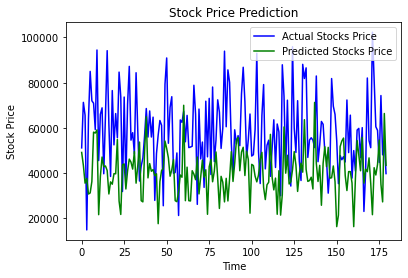

In [87]:
plt.plot(y_test, color = 'blue', label = 'Actual Stocks Price')
plt.plot(knn_preds , color = 'green', label = 'Predicted Stocks Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [88]:
comparison = pd.DataFrame({'Actual':y_test, 'Predicted': knn_preds})
comparison

,Actual,Predicted
0,51190,49170
1,71300,43460
2,65660,35590
3,14920,37720
4,64010,30790
...,...,...
175,44730,54650
176,74320,35120
177,48120,27310
178,54340,66390


## Observation 

Calculated Mean absolute error in case of KNeighborsClassifier Method is 20997.055555555555.

Not a good model, there are lots of errors in the model and  it is not predicting the correct values

### 7) Support Vector Machine Algorithm

In [89]:
from sklearn.svm import SVC
svc_lin = SVC(kernel = 'linear', random_state = 0)
svc_lin.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [90]:
# Using SVC method of svm class to use Kernel SVM Algorithm
from sklearn.svm import SVC
svc_rbf = SVC(kernel = 'rbf', random_state = 0)
svc_rbf.fit(X_train, y_train)

SVC(random_state=0)

In [91]:
print('[7] Support vector machine Method Training accuracy of the model :', svc_lin.score(X_train, y_train))
print('[7] Support vector machine Method Training accuracy of the model :', svc_rbf.score(X_train, y_train))

[7] Support vector machine Method Training accuracy of the model : 0.9175977653631285
[7] Support vector machine Method Training accuracy of the model : 0.02094972067039106


In [92]:
svc_lin_preds = svc_lin.predict(X_test)
svc_rbf_preds = svc_rbf.predict(X_test)

In [93]:
print("MAE from Approach 7 SVM Method for linear Classifier:")
print(mean_absolute_error(y_test, svc_lin_preds))

print()

print("MAE from Approach 7 SVM Method for rbf Classifier:")
print(mean_absolute_error(y_test, svc_rbf_preds))

MAE from Approach 7 SVM Method for linear Classifier:
19457.222222222223

MAE from Approach 7 SVM Method for rbf Classifier:
17696.222222222223


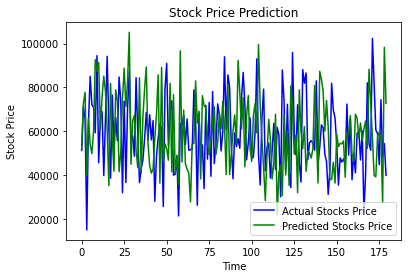

In [94]:
plt.plot(y_test, color = 'blue', label = 'Actual Stocks Price')
plt.plot(svc_lin_preds , color = 'green', label = 'Predicted Stocks Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [95]:
comparison = pd.DataFrame({'Actual':y_test, 'Predicted': svc_lin_preds})
comparison

,Actual,Predicted
0,51190,51850
1,71300,72710
2,65660,77740
3,14920,40190
4,64010,65820
...,...,...
175,44730,59540
176,74320,56400
177,48120,27310
178,54340,98260


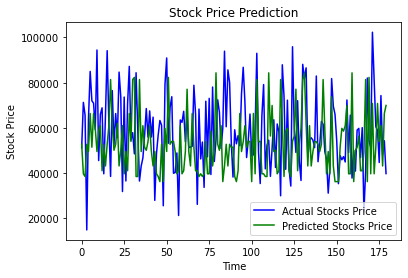

In [96]:
plt.plot(y_test, color = 'blue', label = 'Actual Stocks Price')
plt.plot(svc_rbf_preds , color = 'green', label = 'Predicted Stocks Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [97]:
comparison = pd.DataFrame({'Actual':y_test, 'Predicted': svc_rbf_preds})
comparison

,Actual,Predicted
0,51190,52780
1,71300,39730
2,65660,38530
3,14920,52780
4,64010,49590
...,...,...
175,44730,54060
176,74320,61000
177,48120,43190
178,54340,66390


## Observation 

Calculated Mean absolute error in case of SVM Classifier Method for linear kernelized learning algorithms is 19457.222222222223.


Calculated Mean absolute error in case of SVM Classifier Method for RBF(radial basis function kernel) kernelized learning algorithms is 17696.222222222223.

### 8) Gaussian Naïve Bayes Algorithm

In [98]:
from sklearn.naive_bayes import GaussianNB
gauss = GaussianNB()
gauss.fit(X_train, y_train)

GaussianNB()

In [99]:
print('[8]  Gaussian Naïve Bayes Algorithm Training accuracy of the model :', gauss.score(X_train, y_train))

[8]  Gaussian Naïve Bayes Algorithm Training accuracy of the model : 0.9175977653631285


In [100]:
gauss_preds = gauss.predict(X_test)

In [101]:
print("MAE from Approach 8 Gaussian NB Algorithm:")
print(mean_absolute_error(y_test, gauss_preds))

MAE from Approach 8 Gaussian NB Algorithm:
16636.277777777777


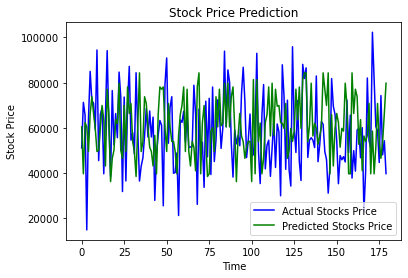

In [102]:
plt.plot(y_test, color = 'blue', label = 'Actual Stocks Price')
plt.plot(gauss_preds , color = 'green', label = 'Predicted Stocks Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [103]:
comparison = pd.DataFrame({'Actual':y_test, 'Predicted': gauss_preds})
comparison

,Actual,Predicted
0,51190,60470
1,71300,39730
2,65660,62380
3,14920,60470
4,64010,49590
...,...,...
175,44730,54060
176,74320,46580
177,48120,53940
178,54340,66390


## Observation 

Calculated Mean absolute error in case of  Gaussian Naïve Bayes Algorithm is 16636.277777777777.

### 9) Linear Regression method

In [104]:
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression()

In [105]:
print('[9] Linear Regression Algorithm Training accuracy of the model :', lin_model.score(X_train, y_train))

[9] Linear Regression Algorithm Training accuracy of the model : 0.006837391513263347


In [106]:
lin_preds = lin_model.predict(X_test)

In [107]:
print("MAE from Approach 9 Linear Regression Algorithm:")
print(mean_absolute_error(y_test, lin_preds))

MAE from Approach 9 Linear Regression Algorithm:
13746.89574640514


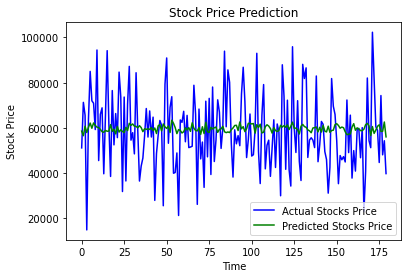

In [108]:
plt.plot(y_test, color = 'blue', label = 'Actual Stocks Price')
plt.plot(lin_preds , color = 'green', label = 'Predicted Stocks Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [109]:
comparison = pd.DataFrame({'Actual':y_test, 'Predicted': lin_preds})
comparison

,Actual,Predicted
0,51190,58595.590662
1,71300,56562.559250
2,65660,60768.285776
3,14920,57971.799332
4,64010,60292.724307
...,...,...
175,44730,61376.129877
176,74320,58475.594382
177,48120,58523.020868
178,54340,62628.247705


## Observation 

Calculated Mean absolute error in case of  Linear Regression model is 13746.89574640514.

### 10) LabelPropagation Algorithm

##### Algorithms that attempt to make use of both labeled and unlabeled training data.

In [110]:
from sklearn.semi_supervised import LabelPropagation

In [111]:
label_model = LabelPropagation()
label_model.fit(X_train, y_train)

LabelPropagation()

In [112]:
print('[10] Label propagation method  Training accuracy of the model :', label_model.score(X_train, y_train))

[10] Label propagation method  Training accuracy of the model : 1.0


In [113]:
label_preds = label_model.predict(X_test)

In [114]:
print("MAE from Approach 11 Lab propagation algorithm:")
print(mean_absolute_error(y_test, label_preds))

MAE from Approach 11 Lab propagation algorithm:
40461.944444444445


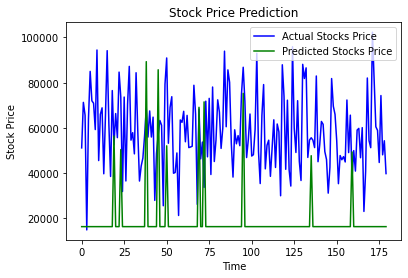

In [115]:
plt.plot(y_test, color = 'blue', label = 'Actual Stocks Price')
plt.plot(label_preds , color = 'green', label = 'Predicted Stocks Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [116]:
comparison = pd.DataFrame({'Actual':y_test, 'Predicted': label_preds})
comparison

,Actual,Predicted
0,51190,16370
1,71300,16370
2,65660,16370
3,14920,16370
4,64010,16370
...,...,...
175,44730,16370
176,74320,16370
177,48120,16370
178,54340,16370


## Observation 

Calculated Mean absolute error in case of Lab propagation algorithm is 40461.944444444445.

Not a good model, there are lots of errors in the model and  it is not predicting the correct values

# CONCLUSION ...

Order of the models that best suited for predictions according to the applied machine learning models and classifiers in ascending order is given below---

Linear Regression < Ridge Classifier < Random Forest < Decision Tree

From all models we conclude that Linear Regression is better than using other models because it has less mean absolute error in the comparison of others and the predicted values are also more accurate than others , let's again take a look at the predictions done by the Linear Regression model ----

In [117]:
lin_preds

array([58595.59066207, 56562.55924996, 60768.28577573, 57971.79933158,
       60292.72430731, 62176.47362311, 59859.06123796, 62203.56599882,
       61093.75728615, 60351.98517202, 60158.94458072, 59351.50922448,
       58343.55612196, 58079.59823134, 58919.55796444, 58540.29436175,
       58616.58434759, 61460.8009651 , 58477.84713701, 59441.58977073,
       57389.24682509, 60669.55721097, 58176.73361607, 59212.05312419,
       58453.60777681, 57927.37414754, 60248.72143977, 58853.42020517,
       62064.28784246, 61140.34625331, 61767.56120242, 60787.90099646,
       60711.87792653, 60047.50734711, 61011.27963816, 60159.06321001,
       58374.67237672, 59633.4594985 , 59393.62233878, 59613.90359241,
       59362.20239682, 60133.1120405 , 58785.92652447, 59970.70607283,
       57529.69584498, 60957.78411912, 61442.2379786 , 58690.29534778,
       61754.13364385, 60452.54417537, 59798.65916704, 60856.68416999,
       57986.48672564, 63404.74475055, 62057.44060523, 60164.13932329,
      

In [118]:
comparison = pd.DataFrame({'Actual':y_test, 'Predicted': lin_preds})
comparison

,Actual,Predicted
0,51190,58595.590662
1,71300,56562.559250
2,65660,60768.285776
3,14920,57971.799332
4,64010,60292.724307
...,...,...
175,44730,61376.129877
176,74320,58475.594382
177,48120,58523.020868
178,54340,62628.247705


### Hence,  you can see the best predictions for Super market  by selecting the best model,  Linear Regression model... 